170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.4793 - accuracy: 0.4643 - val_loss: 1.2479 - val_accuracy: 0.5579
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1327 - accuracy: 0.5995 - val_loss: 1.0783 - val_accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9828 - accuracy: 0.6554 - val_loss: 1.0019 - val_accuracy: 0.6467
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8836 - accuracy: 0.6881 - val_loss: 0.9967 - val_accuracy: 0.6580
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8111 - accuracy: 0.7147 - val_loss: 0.8857 - val_accuracy: 0.6902
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7534 - accuracy: 0.7352 - val_loss: 0.8935 - val_accuracy: 0.6907
Epoch 7/10
1563/1563 [==============================] - 6

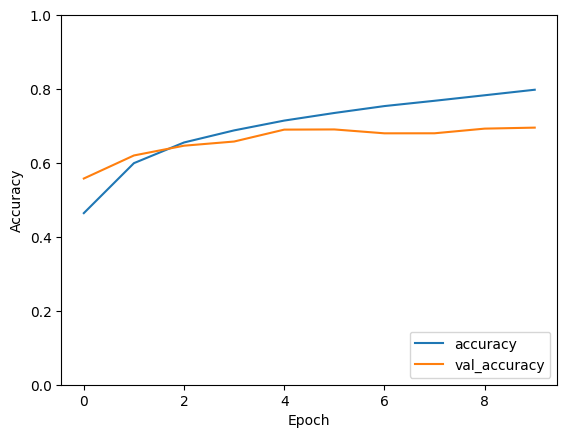

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training/validation accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
